**Goal of the project:** Predict the top 7 out of 24 products which will be bought by the customers of Santander bank in June 2016 


# Load the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
# pylab.rcParams['figure.figsize'] = (10, 6)



pd.set_option("display.max_columns", 90)
pd.set_option("display.max_rows", 1500)
pd.set_option("display.max_colwidth", None)

Populating the interactive namespace from numpy and matplotlib


In [2]:
file_path = r'C:\Users\Mitko\Desktop\Machine Learning Practice\Summer School 2021\santander-product-recommendation\train_ver2.csv'

In [3]:
df = pd.read_csv(file_path, dtype={"sexo":str,
                                                    "ind_nuevo":str,
                                                    "ult_fec_cli_1t":str,
                                                    "indext":str},
                low_memory=False)

Checking each column if there are missing values:

In [4]:
# change fecha_dato and fecha_alta dtype to datetime
# fecha_dato - row identifier date
# fecha_alta - date when the customer joined
df["fecha_dato"] = pd.to_datetime(df["fecha_dato"],format="%Y-%m-%d")
df["fecha_alta"] = pd.to_datetime(df["fecha_alta"],format="%Y-%m-%d")
df["fecha_dato"].unique()

array(['2015-01-28T00:00:00.000000000', '2015-02-28T00:00:00.000000000',
       '2015-03-28T00:00:00.000000000', '2015-04-28T00:00:00.000000000',
       '2015-05-28T00:00:00.000000000', '2015-06-28T00:00:00.000000000',
       '2015-07-28T00:00:00.000000000', '2015-08-28T00:00:00.000000000',
       '2015-09-28T00:00:00.000000000', '2015-10-28T00:00:00.000000000',
       '2015-11-28T00:00:00.000000000', '2015-12-28T00:00:00.000000000',
       '2016-01-28T00:00:00.000000000', '2016-02-28T00:00:00.000000000',
       '2016-03-28T00:00:00.000000000', '2016-04-28T00:00:00.000000000',
       '2016-05-28T00:00:00.000000000'], dtype='datetime64[ns]')

Checking each column if there are missing values:

In [5]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Non-Null Count     Dtype         
---  ------                 --------------     -----         
 0   fecha_dato             13647309 non-null  datetime64[ns]
 1   ncodpers               13647309 non-null  int64         
 2   ind_empleado           13619575 non-null  object        
 3   pais_residencia        13619575 non-null  object        
 4   sexo                   13619505 non-null  object        
 5   age                    13647309 non-null  object        
 6   fecha_alta             13619575 non-null  datetime64[ns]
 7   ind_nuevo              13619575 non-null  object        
 8   antiguedad             13647309 non-null  object        
 9   indrel                 13619575 non-null  float64       
 10  ult_fec_cli_1t         24793 non-null     object        
 11  indrel_1mes            13497528 non-null  object        
 12  tiprel_1mes 

Clearly there is

The data for each client has two main parts:
- First part is the demographics (age, sex etc.) and 
- the second part is the products owned (last 24 cols or all columns containing **"ind_"** ). 


Clearly, there are a lot of columns with missing data, so.. before creating a train and test sets for modelling, first we need to do some **Data Cleaning and Feature Engineering**

In [6]:
# for now the fecha_alto (or the date customer joined will be ignored as it's not viewed as significant information)

df["month"] = pd.DatetimeIndex(df["fecha_dato"]).month
df["age"] = pd.to_numeric(df["age"], errors="coerce")

Now Lets check which columns in the data have missing values:

In [6]:
# checking if there are columns containing missing values
df.isnull().any(axis=0).sum()

22

In [5]:
# change fecha_dato and fecha_alta dtype to datetime
# fecha_dato - row identifier date
# fecha_alta - date when the customer joined
df["fecha_dato"] = pd.to_datetime(df["fecha_dato"],format="%Y-%m-%d")
df["fecha_alta"] = pd.to_datetime(df["fecha_alta"],format="%Y-%m-%d")
df["fecha_dato"].unique()

array(['2015-01-28T00:00:00.000000000', '2015-02-28T00:00:00.000000000',
       '2015-03-28T00:00:00.000000000', '2015-04-28T00:00:00.000000000',
       '2015-05-28T00:00:00.000000000', '2015-06-28T00:00:00.000000000',
       '2015-07-28T00:00:00.000000000', '2015-08-28T00:00:00.000000000',
       '2015-09-28T00:00:00.000000000', '2015-10-28T00:00:00.000000000',
       '2015-11-28T00:00:00.000000000', '2015-12-28T00:00:00.000000000',
       '2016-01-28T00:00:00.000000000', '2016-02-28T00:00:00.000000000',
       '2016-03-28T00:00:00.000000000', '2016-04-28T00:00:00.000000000',
       '2016-05-28T00:00:00.000000000'], dtype='datetime64[ns]')

# Data Cleaning

Let's start checking the age distribution:

In [8]:
# for now the fecha_alto (or the date customer joined will be ignored as it's not viewed as significant information)

df["month"] = pd.DatetimeIndex(df["fecha_dato"]).month
df["age"] = pd.to_numeric(df["age"], errors="coerce")

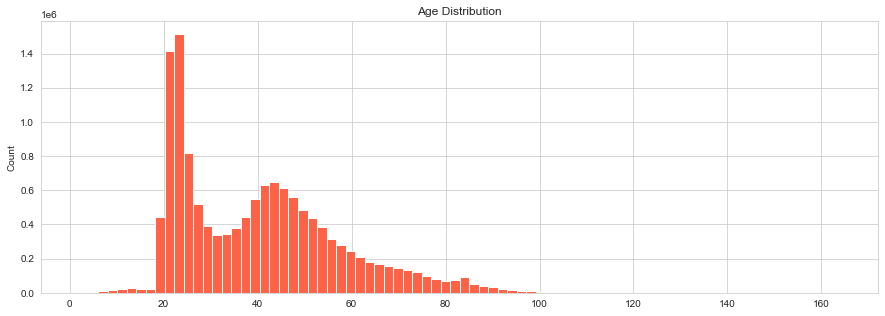

In [9]:
# with sns.plotting_context("notebook",font_scale=1.2):
# sns.set(rc={'figure.figsize':(5, 20)})

plt.figure(figsize=(15, 5))
# sns.set_hls_values
sns.set_style("whitegrid")
plt.hist(df["age"].dropna(),
             bins=80,
             color="tomato")



plt.title("Age Distribution")
plt.ylabel("Count")
plt.show()

In [11]:
df["age"].unique()

array([ 35.,  23.,  22.,  24.,  65.,  28.,  25.,  26.,  53.,  27.,  32.,
        37.,  31.,  39.,  63.,  33.,  55.,  42.,  58.,  38.,  50.,  30.,
        45.,  44.,  36.,  29.,  60.,  57.,  67.,  47.,  nan,  34.,  48.,
        46.,  54.,  84.,  15.,  12.,   8.,   6.,  83.,  40.,  77.,  69.,
        52.,  59.,  43.,  10.,   9.,  49.,  41.,  51.,  78.,  16.,  11.,
        73.,  62.,  66.,  17.,  68.,  82.,  95.,  96.,  56.,  61.,  79.,
        72.,  14.,  19.,  13.,  86.,  64.,  20.,  89.,  71.,   7.,  70.,
        74.,  21.,  18.,  75.,   4.,  80.,  81.,   5.,  76.,  92.,  93.,
        85.,  91.,  87.,  90.,  94.,  99.,  98.,  88.,  97., 100., 101.,
       106., 103.,   3.,   2., 102., 104., 111., 107., 109., 105., 112.,
       115., 110., 116., 108., 113., 126., 117., 163., 127., 114., 164.])

Hmm, seems like there are some strange values. For example: there are people with age above 110 years old.. there are even people with age equaling 164. On the other hand there are also clients who are 2,3 or 6 years old.. something which seems unusual. Therefore we're going to treat these values as outliers and clean them up.

- Let's check some statistics



In [23]:
print(f"Average age of clients: {int(df.age.mean())}")

Average age of clients: 40


In [24]:
# people below 18 years of age (as %)
age_less_18 = df["age"].loc[df["age"] < 18].count() / df["age"].count() * 100

print(f'Total num of clients with age < 18: {df["age"].loc[df["age"] < 18].count()}')
print(f'Total num of clients: {df["age"].count()}')
print(f'Percentage of clients with age 18 or less: {round(age_less_18, 2)} %')

Total num of clients with age < 18: 118796
Total num of clients: 13619575
Percentage of clients with age 18 or less: 0.87 %


In [26]:
# people below 18 years of age (as %)
age_more_100 = df["age"].loc[df["age"] > 100].count() / df["age"].count() * 100

print(f'Total num of clients with age > 100: {df["age"].loc[df["age"] > 100].count()}')
print(f'Total num of clients: {df["age"].count()}')
print(f'Percentage of clients with age 100 or more: {round(age_more_100, 2)} %')

Total num of clients with age > 100: 12869
Total num of clients: 13619575
Percentage of clients with age 100 or more: 0.09 %


There are different possible approaches how to handle these outliers.

The distrubition graph above shows a bimodal distribution where there are two main groups of clients: 
- People in "students" age (between 18 and 30 years old) and 
- Middle aged group (between 30 and 60 years old)

One approach to handle the outliers is to take the people who are 18 years old or less and change their age value to the mean of the first group (between 18 and 30 years of age). Then the same could be done with the people above a 100, who will be allocated to the middle aged group (between 30 and 60 years of age)

**Second approach (the chosen one)** - simply ignore these instances (since they represent below 1% of the total dataset)

In [27]:
# Second approach is chosen
age_mask = df["age"].loc[(df["age"] > 18) &
             (df["age"] < 100)].index

In [28]:
df = df.iloc[age_mask, :]

In [29]:
del  age_mask, age_less_18, age_more_100

In [30]:
df.shape

(13473871, 49)

On to the next columns:

- **"tipodom"** (*Address type1*) and **"cod_prov"** (*Province code*)  don't seem to be useful since we have the name in the province in **"nomprov"** so we're going to delete those features

In [31]:
df.drop(["tipodom","cod_prov"],axis=1,inplace=True)

C:\Users\Mitko\.conda\envs\py39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13473871 entries, 0 to 13647308
Data columns (total 47 columns):
 #   Column                 Non-Null Count     Dtype         
---  ------                 --------------     -----         
 0   fecha_dato             13473871 non-null  datetime64[ns]
 1   ncodpers               13473871 non-null  int64         
 2   ind_empleado           13473871 non-null  object        
 3   pais_residencia        13473871 non-null  object        
 4   sexo                   13473818 non-null  object        
 5   age                    13473871 non-null  float64       
 6   fecha_alta             13473871 non-null  datetime64[ns]
 7   ind_nuevo              13473871 non-null  object        
 8   antiguedad             13473871 non-null  object        
 9   indrel                 13473871 non-null  float64       
 10  ult_fec_cli_1t         24568 non-null     object        
 11  indrel_1mes            13352618 non-null  object        
 12  tiprel_1mes 

There are also two columns **"ult_fec_cli_1t" and "conyuemp"** which contain very little data. We'll get rid of them since they won't add much to the performance of our model..

In [35]:
df.drop(["ult_fec_cli_1t", "conyuemp"], axis=1, inplace=True)

C:\Users\Mitko\.conda\envs\py39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Checking if there are still columns with missing data:

In [36]:
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                      True
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
indrel_1mes               True
tiprel_1mes               True
indresi                  False
indext                   False
canal_entrada             True
indfall                  False
nomprov                   True
ind_actividad_cliente    False
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme_fin_ult1        False
ind_dela_fin_ult1        False
ind_ecue

Let's explore the "nomprov":

In [37]:
df["nomprov"].unique()

array(['MALAGA', 'CIUDAD REAL', 'ZARAGOZA', 'TOLEDO', 'LEON', 'GIPUZKOA',
       'CACERES', 'GIRONA', 'ZAMORA', 'BARCELONA', 'SALAMANCA', 'BURGOS',
       'HUESCA', 'NAVARRA', 'AVILA', 'SEGOVIA', 'LUGO', 'LERIDA',
       'MADRID', 'ALICANTE', 'SORIA', 'SEVILLA', 'CANTABRIA',
       'BALEARS, ILLES', 'VALLADOLID', 'PONTEVEDRA', 'VALENCIA', 'TERUEL',
       'CORUÑA, A', 'OURENSE', 'JAEN', 'CUENCA', 'BIZKAIA', 'CASTELLON',
       'RIOJA, LA', 'ALBACETE', 'BADAJOZ', 'MURCIA', 'CADIZ', 'ALMERIA',
       'GUADALAJARA', 'PALENCIA', 'PALMAS, LAS', 'CORDOBA', 'HUELVA',
       'GRANADA', 'ASTURIAS', 'SANTA CRUZ DE TENERIFE', 'MELILLA',
       'TARRAGONA', 'ALAVA', nan, 'CEUTA'], dtype=object)

There is a unicode problem with Ñ in **CORUÑA, A** + some nan values which will be filled in as *UNKNOWN*

In [38]:
df.loc[df["nomprov"]=="CORU\xc3\x91A, A", "nomprov"] = "CORUNA, A"

C:\Users\Mitko\.conda\envs\py39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [39]:
df.loc[df["nomprov"].isnull(), "nomprov"] = "UNKNOWN"

C:\Users\Mitko\.conda\envs\py39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Checking the columns again:

In [40]:
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                      True
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
indrel_1mes               True
tiprel_1mes               True
indresi                  False
indext                   False
canal_entrada             True
indfall                  False
nomprov                  False
ind_actividad_cliente    False
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme_fin_ult1        False
ind_dela_fin_ult1        False
ind_ecue

"renta" column, which shows the income of the clients, seems interesting. Let's explore it further..

In [45]:
print(f"Column renta missing values: {df.renta.isnull().sum()}")

Column renta missing values: 2745916


- renta has quite a lot of missing values, simply filling them in with the median value is not ideal
- Instead, **we will fill in the income of the clients based on region they are in**, something which should be more accurate

In [46]:
rentas = df.loc[df["renta"].notnull()].groupby("nomprov").agg({"renta":median})
rentas = rentas.sort_values(by="renta")

In [47]:
rentas = rentas.sort_values(by="renta")

In [48]:
rentas.keys()

Index(['renta'], dtype='object')

In [49]:
rentas_ser = rentas["renta"]

In [50]:
rentas_ser

nomprov
CIUDAD REAL                62186.19
BADAJOZ                    62301.90
LUGO                       64390.53
LERIDA                     64849.62
CASTELLON                  66630.30
CUENCA                     67230.81
ALICANTE                   67470.93
CACERES                    67750.71
MURCIA                     67807.92
JAEN                       67919.07
AVILA                      68470.68
TOLEDO                     68823.15
HUELVA                     69000.99
CORDOBA                    69041.67
VALENCIA                   72835.92
HUESCA                     73293.99
ALMERIA                    73378.80
ZAMORA                     74663.01
TERUEL                     76435.05
ALBACETE                   78574.83
SORIA                      78838.92
CADIZ                      78906.99
OURENSE                    79024.68
GIPUZKOA                   80599.14
PALMAS, LAS                80824.35
LEON                       81008.76
GRANADA                    82377.15
SANTA CRUZ DE TENERI

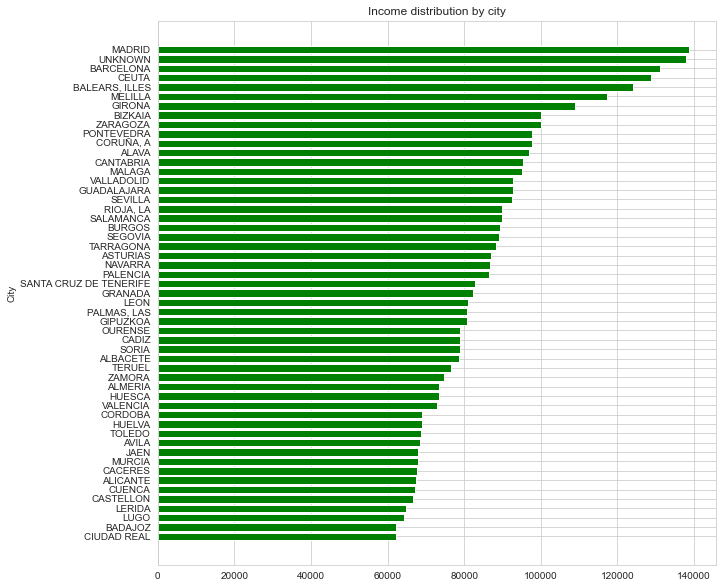

In [51]:
plt.figure(figsize=(10, 10))
# sns.set_hls_values
sns.set_style("whitegrid")
plt.barh(y=rentas_ser.index,
         width=rentas_ser,
#              bins=80,
             color="g")



plt.title("Income distribution by city")
plt.ylabel("City")
plt.show()

The plot above clearly shows that there are some significant differences in terms of income distribution by city, so filling in the salaries based on the city seems like a decent choice.. Let's do that

In [52]:
df = pd.merge(df, rentas, how="inner", on="nomprov")

In [53]:
df.loc[df["renta_x"].isnull(), ["renta_x", "renta_y", "nomprov"]]

,renta_x,renta_y,nomprov
2,NaN,94961.91,MALAGA
8,NaN,94961.91,MALAGA
19,NaN,94961.91,MALAGA
20,NaN,94961.91,MALAGA
24,NaN,94961.91,MALAGA
...,...,...,...
13473862,NaN,128699.58,CEUTA
13473865,NaN,128699.58,CEUTA
13473866,NaN,128699.58,CEUTA
13473868,NaN,128699.58,CEUTA


In [54]:
df.rename(columns={"renta_y": "renta"}, inplace=True)

In [55]:
df = df.drop(["renta_x"], axis=1)

In [57]:
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                      True
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
indrel_1mes               True
tiprel_1mes               True
indresi                  False
indext                   False
canal_entrada             True
indfall                  False
nomprov                  False
ind_actividad_cliente    False
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme_fin_ult1        False
ind_dela_fin_ult1        False
ind_ecue_fin_ult1        False
ind_fond

Check the two products **"ind_nomina_ult1" and "ind_nom_pens_ult1"** that have missing values

In [60]:
df["ind_nomina_ult1"].isnull().sum()

214

In [61]:
df["ind_nom_pens_ult1"].isnull().sum()

214

The fastest and easiest way out is to assign them as not haves (or not purchased) equaling 0s

In [62]:
df.loc[df["ind_nomina_ult1"].isnull(), "ind_nomina_ult1"] = 0

In [63]:
df.loc[df["ind_nom_pens_ult1"].isnull(), "ind_nom_pens_ult1"] = 0

In [64]:
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                      True
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
indrel_1mes               True
tiprel_1mes               True
indresi                  False
indext                   False
canal_entrada             True
indfall                  False
nomprov                  False
ind_actividad_cliente    False
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme_fin_ult1        False
ind_dela_fin_ult1        False
ind_ecue_fin_ult1        False
ind_fond

Seems there are still a few columns with missing values left. Let's check their unique values in order to fill them in appropriately

In [65]:
missing_cols = [col for col in df if df[col].isnull().any()]

In [66]:
missing_cols

['sexo', 'indrel_1mes', 'tiprel_1mes', 'canal_entrada', 'segmento']

In [68]:
for col in missing_cols:
    print("Unique values for {0}:\n{1}".format(col,df[col].unique()))
    print(f"Values distribution:\n{df[col].value_counts(normalize=True)}")
    print(f"Missing values: {df[col].isnull().sum()}")
    print()

Unique values for sexo:
['H' 'V' nan]
Values distribution:
V    0.54562
H    0.45438
Name: sexo, dtype: float64
Missing values: 53

Unique values for indrel_1mes:
['1.0' '1' '4.0' '3.0' '3' 'P' nan '2' '2.0' '4']
Values distribution:
1.0    0.676623
1      0.322865
3.0    0.000207
3      0.000118
P      0.000065
2.0    0.000055
2      0.000043
4.0    0.000017
4      0.000006
Name: indrel_1mes, dtype: float64
Missing values: 121253

Unique values for tiprel_1mes:
['A' 'I' 'P' 'R' nan 'N']
Values distribution:
I    5.437069e-01
A    4.558804e-01
P    3.476472e-04
R    6.493109e-05
N    7.489168e-08
Name: tiprel_1mes, dtype: float64
Missing values: 121253

Unique values for canal_entrada:
['KHL' 'KFC' 'KHE' 'KHD' 'KAT' 'KFA' 'KAZ' 'RED' 'KEH' 'KHC' 'KFN' 'KAJ'
 'KFP' 'KFJ' 'KHK' 'KAQ' 'KHN' 'KHF' 'KCG' '007' 'KEU' 'KBZ' 'KBO' 'KES'
 'KCA' 'KAG' 'KCB' 'KAD' 'KBQ' 'KAS' 'KAY' 'KAI' 'KCF' 'KEY' 'KAF' 'KCC'
 '013' 'KAE' 'KEZ' 'KEG' 'KAC' 'KBH' 'KCI' 'KAW' 'KEJ' 'KAP' 'KAR' 'KAM'
 'KAB' 'KCH' 

In [ ]:
# sexo - 0.54 vs 0.46 distribution - will fill it in with most common value (only 53 missing so cleaning method is statistically insignificant )
# indrel_1mes - customer type (will fill it in with 1s (consist of 99% of the distribution))
# tiprel_1mes - customer relation type (A - active; I - inactive; P - former customer; R - potential) - fill in with Unknown for now;
# canal_entrada - channel used by the customer to join - fill in with unknown
# segmento - segmentation - 01 - VIP; 02 - Individuals; 03 - college graduated

Starting from the **sexo"** column. Because there are only 53 missing values, we're simply going to assign them to the majority class which in this case is "V"

In [69]:
df.loc[df["sexo"].isnull(), "sexo"] = "V"


Next, the **"indrel_1mes"** column:

This represents the customer type. <br>
We will fill in the missing values with 1s because they consist of 99% of the whole distribution <br>
Furthermore, the values in this column don't follow the same format (e.g. there are 1s and 1.0s which currently are treated as different values). Let's change that..

In [71]:
df.loc[df["indrel_1mes"].isnull(), "indrel_1mes"] = "1"

In [72]:
indrel_map ={
    1.0  : "1",
    "1.0" : "1",
    "1"   : "1",
    "3.0" : "3",
    "P"   : "P",
    3.0   : "3",
    2.0   : "2",
    "3"   : "3",
    "2.0" : "2",
    "4.0" : "4",
    "4"   : "4",
    "2"   : "2"
}

In [73]:
df["indrel_1mes"] = df["indrel_1mes"].apply(lambda x: indrel_map.get(x, x))

Next let's tackle the **"segmento"** column

Check if income makes a difference for segmento

In [76]:
segm_gr = df.loc[df["segmento"].notnull()].groupby("segmento").agg({"renta": mean})

In [77]:
segm_gr

,renta
segmento,
01 - TOP,121435.440987
02 - PARTICULARES,111322.218862
03 - UNIVERSITARIO,95695.883719


Hmm, not enough to use only the income (renta) to fill in the missing values. <br>
Instead, let's train a classification model to fill them in. 

First we need to choose independent variables in order to predict "segmento"

In [80]:
ind_features = ["ind_empleado", "pais_residencia", "age", "ind_nuevo", "antiguedad",
                "indrel", "indrel_1mes", "indresi", "indext", "indfall", "nomprov", 
                "ind_actividad_cliente", "renta"]

Next, we will do OneHotEncoding for the categorical ones (this is done because classification models don't work with textual data, only numbers)

In [81]:
df_dummies = pd.get_dummies(data=df[ind_features])

In [82]:
df_dummies = df_dummies.join(df["segmento"])

After OneHotEncoding the data looks like this

In [84]:
df_dummies.head()

,age,indrel,ind_actividad_cliente,renta,ind_empleado_A,ind_empleado_B,ind_empleado_F,ind_empleado_N,ind_empleado_S,pais_residencia_AD,pais_residencia_AE,pais_residencia_AL,pais_residencia_AO,pais_residencia_AR,pais_residencia_AT,pais_residencia_AU,pais_residencia_BA,pais_residencia_BE,pais_residencia_BG,pais_residencia_BM,pais_residencia_BO,pais_residencia_BR,pais_residencia_BY,pais_residencia_BZ,pais_residencia_CA,pais_residencia_CD,pais_residencia_CF,pais_residencia_CG,pais_residencia_CH,pais_residencia_CI,pais_residencia_CL,pais_residencia_CM,pais_residencia_CN,pais_residencia_CO,pais_residencia_CR,pais_residencia_CU,pais_residencia_CZ,pais_residencia_DE,pais_residencia_DJ,pais_residencia_DK,pais_residencia_DO,pais_residencia_DZ,pais_residencia_EC,pais_residencia_EE,pais_residencia_EG,...,nomprov_BIZKAIA,nomprov_BURGOS,nomprov_CACERES,nomprov_CADIZ,nomprov_CANTABRIA,nomprov_CASTELLON,nomprov_CEUTA,nomprov_CIUDAD REAL,nomprov_CORDOBA,"nomprov_CORUÑA, A",nomprov_CUENCA,nomprov_GIPUZKOA,nomprov_GIRONA,nomprov_GRANADA,nomprov_GUADALAJARA,nomprov_HUELVA,nomprov_HUESCA,nomprov_JAEN,nomprov_LEON,nomprov_LERIDA,nomprov_LUGO,nomprov_MADRID,nomprov_MALAGA,nomprov_MELILLA,nomprov_MURCIA,nomprov_NAVARRA,nomprov_OURENSE,nomprov_PALENCIA,"nomprov_PALMAS, LAS",nomprov_PONTEVEDRA,"nomprov_RIOJA, LA",nomprov_SALAMANCA,nomprov_SANTA CRUZ DE TENERIFE,nomprov_SEGOVIA,nomprov_SEVILLA,nomprov_SORIA,nomprov_TARRAGONA,nomprov_TERUEL,nomprov_TOLEDO,nomprov_UNKNOWN,nomprov_VALENCIA,nomprov_VALLADOLID,nomprov_ZAMORA,nomprov_ZARAGOZA,segmento
0,35.0,1.0,1.0,94961.91,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,02 - PARTICULARES
1,32.0,1.0,1.0,94961.91,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,02 - PARTICULARES
2,58.0,1.0,0.0,94961.91,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,02 - PARTICULARES
3,24.0,1.0,0.0,94961.91,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,03 - UNIVERSITARIO
4,22.0,1.0,0.0,94961.91,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,03 - UNIVERSITARIO


Now let's create train and test data for our classification model. <br>
We'll use a random 500k examples to train our DecisionTreeClassifier. <br>
Then we'll test it using cross validation to check if its prediction accuracy is high. Anything above 70-80% will make us confident that the missing values would be filled in accurately.

In [85]:
# create train and test data
segm_train = df_dummies.loc[df_dummies["segmento"].notnull(), :]
segm_test = df_dummies.loc[df_dummies["segmento"].isnull(), :]
del df_dummies

In [86]:
segm_test.shape

(160281, 452)

In [87]:
# segm_train_sample = segm_train.loc[:500000]
segm_train_sample = segm_train.sample(n=500000)

In [88]:
segm_y_train = segm_train_sample["segmento"]
segm_X_train = segm_train_sample.drop("segmento", axis=1)
del segm_train

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [90]:
tree_clf = DecisionTreeClassifier(random_state=8)

In [91]:
# del segm_X_train, segm_y_train

In [92]:
# yields around 90% accuracy on avg which is great
cross_val_score(tree_clf, segm_X_train, segm_y_train, cv=5)

array([0.90142, 0.90026, 0.90143, 0.90098, 0.90181])

In [93]:
segm_y_test = segm_test["segmento"]
segm_X_test = segm_test.drop("segmento", axis=1)
del segm_test

In [94]:
tree_clf.fit(X=segm_X_train, y=segm_y_train)
segm_predictions = tree_clf.predict(segm_X_test)

In [95]:
segm_predictions

array(['02 - PARTICULARES', '02 - PARTICULARES', '02 - PARTICULARES', ...,
       '02 - PARTICULARES', '02 - PARTICULARES', '02 - PARTICULARES'],
      dtype=object)

In [96]:
segm_predictions.shape

(160281,)

In [97]:
segm_X_test.shape

(160281, 451)

In [98]:
# replace the empty rows of segmento with the predictions
df.loc[df["segmento"].isnull(), "segmento"] = segm_predictions

train another DecisionTreeClassifier to fill in the missing values for tiprel_1mes (include the updated "segmento" as an independent feature as well)

In [99]:
ind_features = ["ind_empleado", "pais_residencia", "age", "ind_nuevo", "antiguedad",
                "indrel", "indrel_1mes", "indresi", "indext", "indfall", "nomprov", 
                "ind_actividad_cliente", "renta", "segmento"]


df_dummies = pd.get_dummies(data=df[ind_features])

In [100]:
df_dummies = df_dummies.join(df["tiprel_1mes"])

In [101]:
# create train and test data
tiprel_train = df_dummies.loc[df_dummies["tiprel_1mes"].notnull(), :]
tiprel_test = df_dummies.loc[df_dummies["tiprel_1mes"].isnull(), :]
del df_dummies

In [102]:
tiprel_test.shape

(121253, 455)

In [103]:
# segm_train_sample = segm_train.loc[:500000]
tiprel_train_sample = tiprel_train.sample(n=500000)

In [104]:
tiprel_y_train = tiprel_train_sample["tiprel_1mes"]
tiprel_X_train = tiprel_train_sample.drop("tiprel_1mes", axis=1)
del tiprel_train

In [105]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [106]:
tree_clf = DecisionTreeClassifier(random_state=8)

In [107]:
# del segm_X_train, segm_y_train

In [108]:
# yields around 88% accuracy on avg which is great
cross_val_score(tree_clf, tiprel_X_train, tiprel_y_train, cv=5)

array([0.88251, 0.88108, 0.88355, 0.88395, 0.88109])

In [109]:
tiprel_y_test = tiprel_test["tiprel_1mes"]
tiprel_X_test = tiprel_test.drop("tiprel_1mes", axis=1)
del tiprel_test

In [110]:
tree_clf.fit(X=tiprel_X_train, y=tiprel_y_train)
tiprel_predictions = tree_clf.predict(tiprel_X_test)

In [111]:
tiprel_predictions

array(['I', 'A', 'A', ..., 'A', 'A', 'A'], dtype=object)

In [112]:
df.loc[df["tiprel_1mes"].isnull(), "tiprel_1mes"] = tiprel_predictions

What's remained of the missing columns is **"canal_entrada"**. We will take the easy way out and fill it in with "UNKNOWN" value

In [113]:
df.loc[df["canal_entrada"].isnull(), "canal_entrada"] = "UNKNOWN"

Checking if there are columns with missing values left..

In [114]:
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                     False
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
indrel_1mes              False
tiprel_1mes              False
indresi                  False
indext                   False
canal_entrada            False
indfall                  False
nomprov                  False
ind_actividad_cliente    False
segmento                 False
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme_fin_ult1        False
ind_dela_fin_ult1        False
ind_ecue_fin_ult1        False
ind_fond

Voila! We have cleaned our data successfully!

In [115]:
del segm_X_test, segm_X_train, segm_predictions, segm_train_sample, segm_y_test, segm_y_train
del tiprel_predictions, tiprel_train_sample, tiprel_X_test, tiprel_X_train, tiprel_y_test, tiprel_y_train

# Feature Engineering